In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt

In [2]:
df = read_csv('errors.csv')

In [3]:
df.head()

,threshold,similarity,take_first,mae,f1_3,f1_4
0,10,0.7,10,32.00,89.43,70.46
1,10,0.7,20,31.70,89.90,70.73
2,10,0.7,30,31.60,90.01,70.79
3,10,0.7,50,31.57,90.05,70.84
4,10,0.7,100,31.55,90.06,70.87


In [4]:
df = df.groupby(
    by=['threshold','similarity'],
    as_index=False,
)[['take_first','mae','f1_3','f1_4']].agg(lambda x: list(x))

In [5]:
df.head()

,threshold,similarity,take_first,mae,f1_3,f1_4
0,10,0.7,"[10, 20, 30, 50, 100, 120, 200]","[32.0, 31.7, 31.6, 31.57, 31.55, 31.55, 31.55]","[89.43, 89.9, 90.01, 90.05, 90.06, 90.06, 90.06]","[70.46, 70.73, 70.79, 70.84, 70.87, 70.87, 70.88]"
1,10,0.8,"[10, 20, 30, 50, 100, 120, 200]","[32.0, 31.7, 31.6, 31.57, 31.55, 31.55, 31.55]","[89.43, 89.9, 90.01, 90.05, 90.06, 90.06, 90.06]","[70.46, 70.73, 70.79, 70.84, 70.87, 70.87, 70.88]"
2,10,0.9,"[10, 20, 30, 50, 100, 120, 200]","[32.0, 31.7, 31.6, 31.57, 31.55, 31.55, 31.55]","[89.43, 89.9, 90.01, 90.05, 90.06, 90.06, 90.06]","[70.46, 70.73, 70.79, 70.84, 70.87, 70.87, 70.88]"
3,20,0.7,"[10, 20, 30, 50, 100, 120, 200]","[31.78, 31.57, 31.52, 31.53, 31.52, 31.53, 31.53]","[90.03, 90.36, 90.44, 90.44, 90.44, 90.44, 90.44]","[71.25, 71.35, 71.35, 71.34, 71.35, 71.35, 71.35]"
4,20,0.8,"[10, 20, 30, 50, 100, 120, 200]","[31.78, 31.57, 31.52, 31.53, 31.52, 31.53, 31.53]","[90.03, 90.36, 90.44, 90.44, 90.44, 90.44, 90.44]","[71.25, 71.35, 71.35, 71.34, 71.35, 71.35, 71.35]"


In [6]:
rows = df.to_numpy()

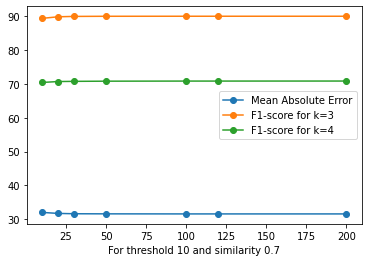

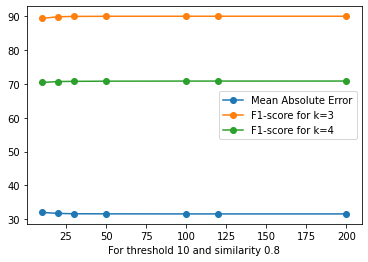

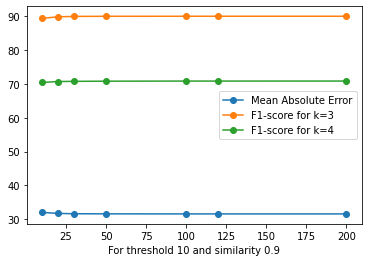

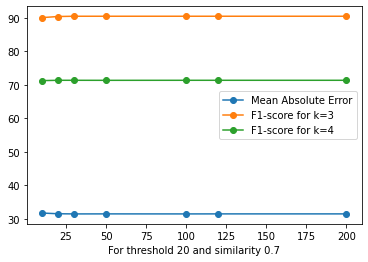

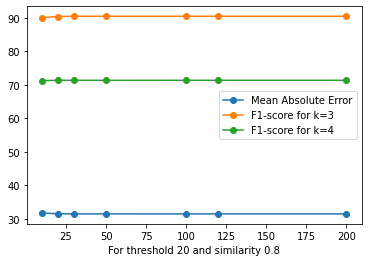

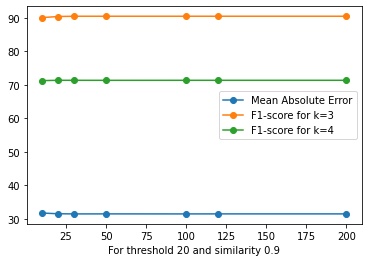

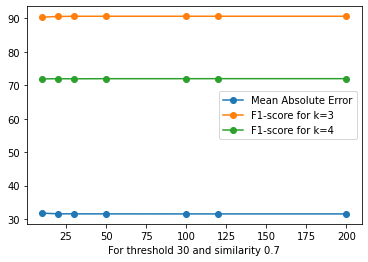

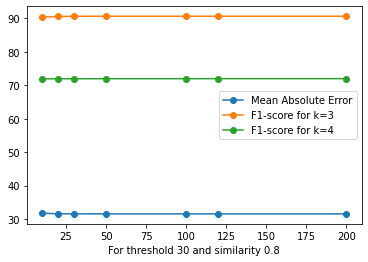

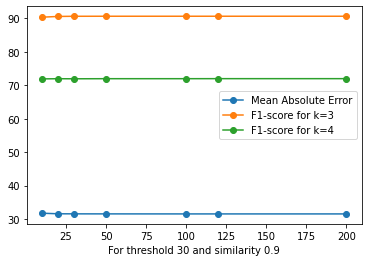

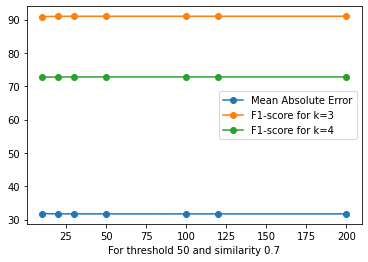

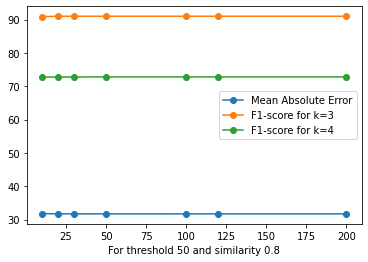

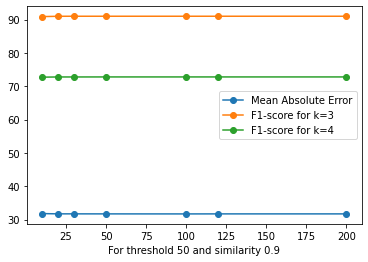

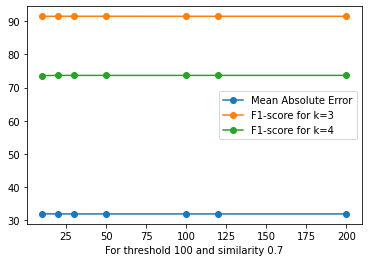

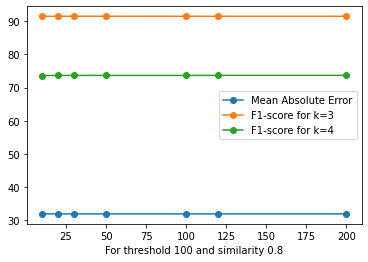

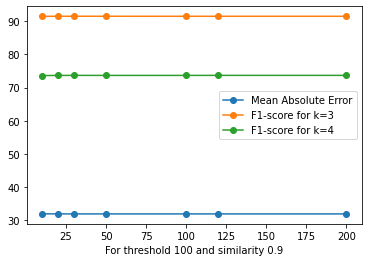

In [7]:
for row in rows:
    t = row[0]
    s = row[1]
    plt.plot(row[2], row[3], label='Mean Absolute Error', marker='o')
    plt.xlabel('For threshold '+str(t)+' and similarity '+str(s))
    plt.plot(row[2], row[4], label='F1-score for k=3', marker='o')
    plt.plot(row[2], row[5], label='F1-score for k=4', marker='o')
    plt.legend()
    plt.savefig(str(t)+'_'+str(s)+'.jpg', format='jpg')
    plt.show()